# Store Sales - Time Series Forecasting
## Use machine learning to predict grocery sales
https://www.kaggle.com/competitions/store-sales-time-series-forecasting/

**train.csv**

The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
store_nbr identifies the store at which the products are sold.
family identifies the type of product sold.
sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.

**test.csv**

The test data, having the same features as the training data. You will predict the target sales for the dates in this file.
The dates in the test data are for the 15 days after the last date in the training data.

**sample_submission.csv**

A sample submission file in the correct format.

**stores.csv**

Store metadata, including city, state, type, and cluster.
cluster is a grouping of similar stores.

**oil.csv**

Daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

**holidays_events.csv**

Holidays and Events, with metadata
NOTE: **Pay special attention to the transferred column**. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.
Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

Additional Notes

Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.


Objective: **Predict sales for the thousands of product families sold at Favorita stores located in Ecuador**

In [1]:
import pandas as pd
import numpy as np

### 1) Check Data
- Useful functions:

    head(n): Returns the first n rows of the DataFrame. By default, it returns the first five rows.

    tail(n): Returns the last n rows of the DataFrame. By default, it returns the last five rows.

    info(): Provides a summary of the DataFrame, including the data types of each column, the number of non-null values, and memory usage. It also gives an overview of the DataFrame's index.

    describe(): Generates descriptive statistics of the DataFrame's numerical columns, such as count, mean, standard deviation, minimum, and maximum values. It provides information on the central tendency, dispersion, and shape of the distribution of the data.

    shape: Returns a tuple representing the dimensions of the DataFrame, i.e., the number of rows and columns.

    columns: Returns a list of column names in the DataFrame.

    index: Returns the index (row labels) of the DataFrame.

    dtypes: Returns the data types of each column in the DataFrame.

    count(): Returns the number of non-null values for each column. It excludes missing or NaN values.

    unique(): Returns the unique values present in a column.

    nunique(): Returns the number of unique values in each column.

    value_counts(): Computes the frequency of unique values in a column.

    isnull(): Generates a Boolean mask indicating where values are missing or NaN.

    corr(): Computes the correlation between columns in the DataFrame.

    mean(): Calculates the mean (average) of each column.

    median(): Calculates the median of each column.
    


In [2]:
"""
Data Files
    holidays_events.csv  sample_submission.csv  test.csv   transactions.csv
    oil.csv              stores.csv             train.csv
"""
holidays_csv = pd.read_csv('./data/holidays_events.csv')
sample_sub_csv = pd.read_csv('./data/sample_submission.csv')
test_csv = pd.read_csv('./data/test.csv')
transactions_csv = pd.read_csv('./data/transactions.csv')
oil_csv = pd.read_csv('./data/oil.csv')
stores_csv = pd.read_csv('./data/stores.csv')
train_csv = pd.read_csv('./data/train.csv')

In [3]:
print(
    sample_sub_csv.shape, 
    
    holidays_csv.shape, 
    transactions_csv.shape, 
    oil_csv.shape, 
    stores_csv.shape, 

    test_csv.shape, 
    train_csv.shape
)

(28512, 2) (350, 6) (83488, 3) (1218, 2) (54, 5) (28512, 5) (3000888, 6)


In [4]:
# Holidays from 2012-03-02 to 2017-12-26
holidays_csv

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [5]:
holidays_csv['description'].unique()

array(['Fundacion de Manta', 'Provincializacion de Cotopaxi',
       'Fundacion de Cuenca', 'Cantonizacion de Libertad',
       'Cantonizacion de Riobamba', 'Cantonizacion del Puyo',
       'Cantonizacion de Guaranda', 'Provincializacion de Imbabura',
       'Cantonizacion de Latacunga', 'Fundacion de Machala',
       'Fundacion de Santo Domingo', 'Cantonizacion de El Carmen',
       'Cantonizacion de Cayambe', 'Fundacion de Esmeraldas',
       'Primer Grito de Independencia', 'Fundacion de Riobamba',
       'Fundacion de Ambato', 'Fundacion de Ibarra',
       'Cantonizacion de Quevedo', 'Independencia de Guayaquil',
       'Traslado Independencia de Guayaquil', 'Dia de Difuntos',
       'Independencia de Cuenca', 'Provincializacion de Santo Domingo',
       'Provincializacion Santa Elena', 'Independencia de Guaranda',
       'Independencia de Latacunga', 'Independencia de Ambato',
       'Fundacion de Quito-1', 'Fundacion de Quito', 'Fundacion de Loja',
       'Navidad-4', 'Cantonizac

In [6]:
holidays_csv[holidays_csv['transferred'] == True]

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


In [7]:
holidays_csv['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [8]:
holidays_csv['locale_name'].unique()

array(['Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo',
       'Guaranda', 'Imbabura', 'Latacunga', 'Machala', 'Santo Domingo',
       'El Carmen', 'Cayambe', 'Esmeraldas', 'Ecuador', 'Ambato',
       'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas', 'Guayaquil'],
      dtype=object)

In [9]:
train_csv

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [10]:
train_csv['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [11]:
train_csv['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

In [12]:
test_csv

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [13]:
test_csv.shape

(28512, 5)

In [14]:
transactions_csv

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [15]:
transactions_csv['store_nbr'].unique()

array([25,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39,
       40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 36, 53, 20, 29, 21,
       42, 22, 52])

In [16]:
oil_csv

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [17]:
stores_csv

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


### 2) Analyze Data

How can we use this data to predict product families sales for the next 30 days

**Hyphothesis**: There is a variable or variables that can we use to build a model that can predict the sales for at least one product family with at least 70-80% precision.

Without looking too much to data, we can assume some things, for example, there are different kinds of products with high demand, for basic needs: starting with food, hygiene, clothing, pets, etc. There are things that are always on demand, and there are things that trend globaly like toys for christmas, women clothing for mothers days, etc.

What this data can help is to create a model that is aware of the local (Ecuador) trends no other country has.

The tricky part I think is, what do we do with the data concerning periods of crisis that escape the scope of cultural behaviour, like eartquakes (unless is a highly active region). Because, unless we are able to predict earthquakes or futbol games, we can't let it have too much importance in the model (but probably the model can notice that by it's own).

Now, let's consider what data goes in, but before that, we have to clean it.

In [19]:
oil_csv.dtypes, oil_csv.isnull().sum()

(date           object
 dcoilwtico    float64
 dtype: object,
 date           0
 dcoilwtico    43
 dtype: int64)

#### Missing data interpolation

In [23]:
oil_csv[oil_csv['dcoilwtico'].isnull()]

,date,dcoilwtico
0,2013-01-01,NaN
14,2013-01-21,NaN
34,2013-02-18,NaN
63,2013-03-29,NaN
104,2013-05-27,NaN
132,2013-07-04,NaN
174,2013-09-02,NaN
237,2013-11-28,NaN
256,2013-12-25,NaN
261,2014-01-01,NaN


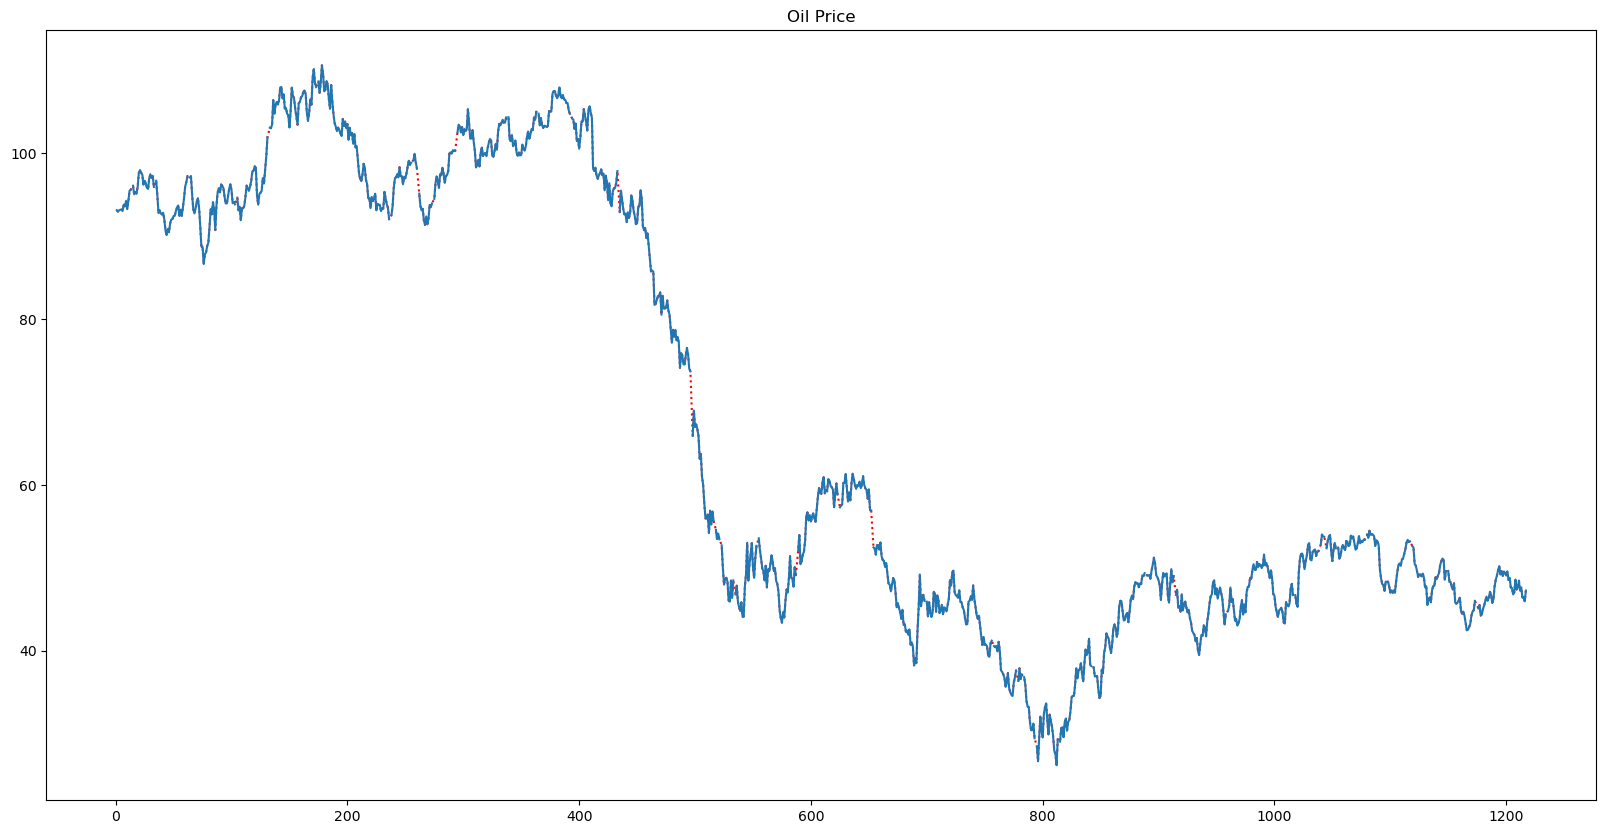

In [24]:
oil_filled = oil_csv['dcoilwtico'].interpolate(method="linear")

oil_filled.plot(color="red", linestyle="dotted", figsize=(20,10));
oil_csv['dcoilwtico'].plot(title="Oil Price", figsize=(20,10));

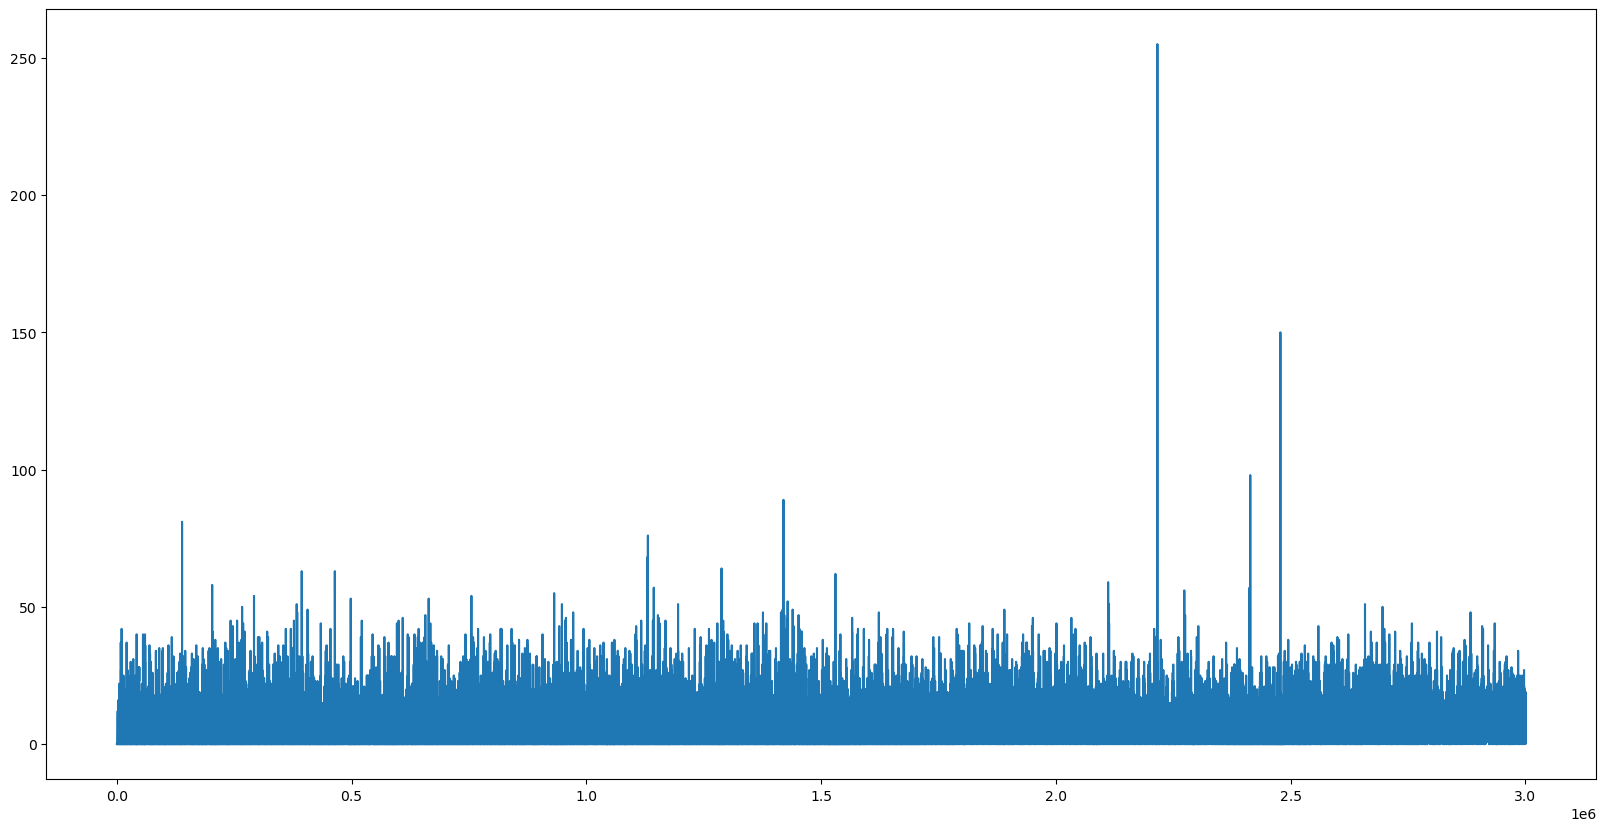

In [68]:
train_csv[train_csv['family'] == 'AUTOMOTIVE']['sales'].plot(figsize=(20,10));

In [27]:
# Parsing Dates
train_csv['date'] = pd.to_datetime(train_csv['date'])
train_csv

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


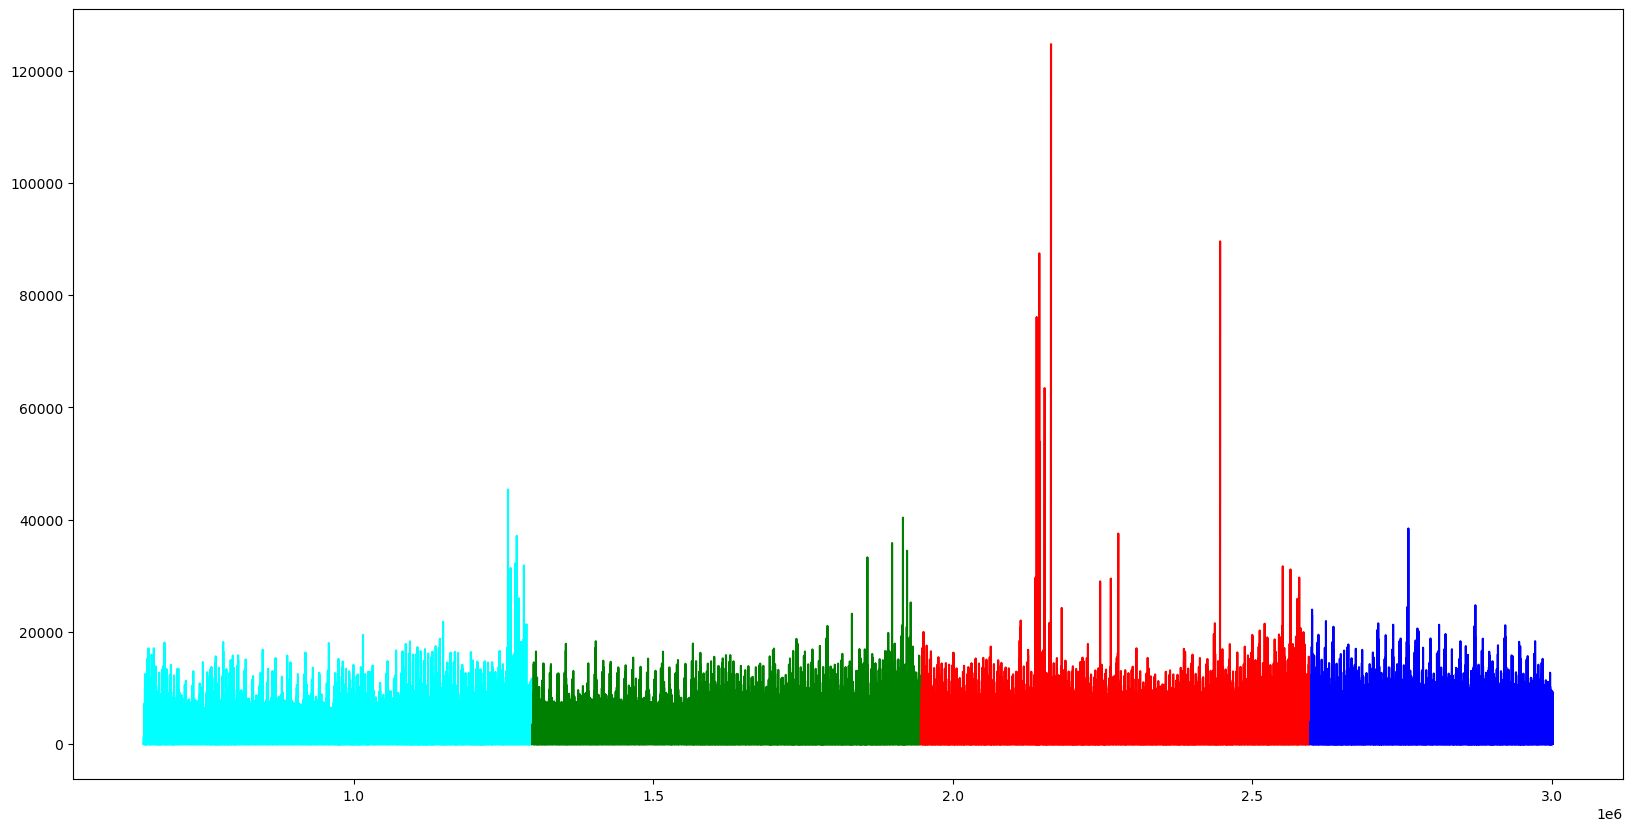

In [28]:
# Some sales comparisons between 4 years
train_csv[(train_csv['date'] >= '2014-1-1') & (train_csv['date'] < '2015-1-1')]['sales'].plot(color='cyan', figsize=(20,10));
train_csv[(train_csv['date'] >= '2015-1-1') & (train_csv['date'] < '2016-1-1')]['sales'].plot(color='green');
train_csv[(train_csv['date'] >= '2016-1-1') & (train_csv['date'] < '2017-1-1')]['sales'].plot(color='red');
train_csv[train_csv['date'] >= '2017-1-1']['sales'].plot(color='blue');

In [29]:
holidays_csv['locale'].unique()

array(['Local', 'Regional', 'National'], dtype=object)

In [30]:
holidays_csv['locale_name'].unique(), holidays_csv['locale_name'].unique().shape

(array(['Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo',
        'Guaranda', 'Imbabura', 'Latacunga', 'Machala', 'Santo Domingo',
        'El Carmen', 'Cayambe', 'Esmeraldas', 'Ecuador', 'Ambato',
        'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
        'Santa Elena', 'Quito', 'Loja', 'Salinas', 'Guayaquil'],
       dtype=object),
 (24,))

In [31]:
stores_csv['city'].unique(),     stores_csv['city'].unique().shape

(array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
        'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
        'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
        'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
       dtype=object),
 (22,))

In [32]:
stores_csv['state'].unique(), stores_csv['state'].unique().shape

(array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
        'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
        'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
        'Esmeraldas', 'Manabi'], dtype=object),
 (16,))

 #### Joining/Merging data

In [33]:
# Train + Stores + Holidays + Transactions
clean_data = train_csv.loc[:]
clean_data.drop(columns=['id'])

clean_data = pd.merge(clean_data, stores_csv, on='store_nbr', how='inner')
clean_data

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6


In [34]:
# Remove days with transferred = True, because that day the holiday was not celebrated.
print(holidays_csv.shape)
holidays_fix = holidays_csv.drop(holidays_csv[holidays_csv['transferred'] == True].index)
holidays_fix

(350, 6)


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [35]:
# Wages from the public sector are paid every two weeks, every 15th and end of the month

start_date = train_csv['date'].min()
end_date = train_csv['date'].max()

dates = pd.date_range(start=start_date, end=end_date, freq='D')

wages_df = pd.DataFrame({'date': dates})

wages_df['month'] = wages_df['date'].dt.month
wages_df['day'] = wages_df['date'].dt.day

mask = (wages_df['day'] == 15) | (wages_df['date'] == wages_df['date'] + pd.offsets.MonthEnd(0))
wages_df_filtered = wages_df[mask].copy()

wages_df_filtered['payday'] = 'public_wage'

wages_df_filtered.reset_index(drop=True, inplace=True)

wages_df_filtered

,date,month,day,payday
0,2013-01-15,1,15,public_wage
1,2013-01-31,1,31,public_wage
2,2013-02-15,2,15,public_wage
3,2013-02-28,2,28,public_wage
4,2013-03-15,3,15,public_wage
...,...,...,...,...
106,2017-06-15,6,15,public_wage
107,2017-06-30,6,30,public_wage
108,2017-07-15,7,15,public_wage
109,2017-07-31,7,31,public_wage


In [36]:
clean_data.shape

(3000888, 10)

In [37]:
# So now for every
clean_data = pd.merge(clean_data, wages_df_filtered[['date', 'payday']], on='date', how='left')
clean_data

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,payday
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,public_wage
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,public_wage
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,public_wage
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,public_wage


In [38]:
clean_data['store_nbr'] = clean_data['store_nbr'].astype(str)
clean_data['cluster'] = clean_data['cluster'].astype(str)

In [39]:
numerical_features = ['sales', 'onpromotion']
categorical_features = ['store_nbr', 'family', 'city', 'state', 'type', 'cluster', 'payday']

In [40]:
numerical_df = clean_data[numerical_features].loc[:]
categorical_df = clean_data[categorical_features].loc[:]

In [41]:
numerical_df.shape, categorical_df.shape

((3000888, 2), (3000888, 7))

In [52]:
test_corr_df = pd.concat([scaled_df, encoded_df], axis=1)
test_corr_df.corr()

,sales,onpromotion,store_nbr_1,store_nbr_10,store_nbr_11,store_nbr_12,store_nbr_13,store_nbr_14,store_nbr_15,store_nbr_16,...,cluster_17,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,payday_public_wage
sales,1.000000,0.427923,-1.286865e-02,-2.303183e-02,1.893803e-02,-2.068722e-02,-2.099265e-02,-1.905276e-02,-1.891066e-02,-1.995333e-02,...,2.922418e-02,-1.737022e-02,-5.720893e-02,-1.346997e-02,9.466551e-02,-4.849023e-03,-3.888765e-02,6.373774e-02,-1.473676e-02,1.137574e-03
onpromotion,0.427923,1.000000,-1.339393e-03,-8.378481e-03,5.895917e-03,-5.458626e-03,-8.250027e-03,-6.393409e-03,-4.922355e-03,-6.158550e-03,...,3.628043e-03,-1.951449e-03,-1.431160e-02,4.760691e-04,9.671055e-03,9.452622e-03,-1.107669e-02,7.941029e-03,-1.207451e-03,2.632863e-03
store_nbr_1,-0.012869,-0.001339,1.000000e+00,-1.886792e-02,-1.886792e-02,-1.886792e-02,-1.886792e-02,-1.886792e-02,-1.886792e-02,-1.886792e-02,...,-1.886792e-02,-2.693862e-02,-5.301053e-02,-3.331483e-02,-1.886792e-02,-4.856429e-02,-2.693862e-02,-3.331483e-02,-2.693862e-02,-4.797250e-16
store_nbr_10,-0.023032,-0.008378,-1.886792e-02,1.000000e+00,-1.886792e-02,-1.886792e-02,-1.886792e-02,-1.886792e-02,-1.886792e-02,-1.886792e-02,...,-1.886792e-02,-2.693862e-02,-5.301053e-02,-3.331483e-02,-1.886792e-02,-4.856429e-02,-2.693862e-02,-3.331483e-02,-2.693862e-02,4.212398e-16
store_nbr_11,0.018938,0.005896,-1.886792e-02,-1.886792e-02,1.000000e+00,-1.886792e-02,-1.886792e-02,-1.886792e-02,-1.886792e-02,-1.886792e-02,...,-1.886792e-02,-2.693862e-02,-5.301053e-02,-3.331483e-02,-1.886792e-02,3.885143e-01,-2.693862e-02,-3.331483e-02,-2.693862e-02,3.548729e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cluster_6,-0.004849,0.009453,-4.856429e-02,-4.856429e-02,3.885143e-01,-4.856429e-02,-4.856429e-02,-4.856429e-02,-4.856429e-02,-4.856429e-02,...,-4.856429e-02,-6.933752e-02,-1.364442e-01,-8.574929e-02,-4.856429e-02,1.000000e+00,-6.933752e-02,-8.574929e-02,-6.933752e-02,-6.628525e-16
cluster_7,-0.038888,-0.011077,-2.693862e-02,-2.693862e-02,-2.693862e-02,-2.693862e-02,-2.693862e-02,7.004042e-01,-2.693862e-02,-2.693862e-02,...,-2.693862e-02,-3.846154e-02,-7.568563e-02,-4.756515e-02,-2.693862e-02,-6.933752e-02,1.000000e+00,-4.756515e-02,-3.846154e-02,-7.722280e-16
cluster_8,0.063738,0.007941,-3.331483e-02,-3.331483e-02,-3.331483e-02,-3.331483e-02,-3.331483e-02,-3.331483e-02,-3.331483e-02,-3.331483e-02,...,-3.331483e-02,-4.756515e-02,-9.359995e-02,-5.882353e-02,-3.331483e-02,-8.574929e-02,-4.756515e-02,1.000000e+00,-4.756515e-02,-8.001004e-16
cluster_9,-0.014737,-0.001207,-2.693862e-02,-2.693862e-02,-2.693862e-02,-2.693862e-02,-2.693862e-02,-2.693862e-02,-2.693862e-02,-2.693862e-02,...,-2.693862e-02,-3.846154e-02,-7.568563e-02,-4.756515e-02,-2.693862e-02,-6.933752e-02,-3.846154e-02,-4.756515e-02,1.000000e+00,-6.364100e-16


In [53]:
corr_df = test_corr_df.corr()

In [105]:
corrs_f = []
for fname in test_corr_df.columns:
    corrs_f.append(corr_df[fname][corr_df[fname] > 0.4])
corrs_f

[sales               1.000000
 onpromotion         0.427923
 family_GROCERY I    0.548490
 Name: sales, dtype: float64,
 sales          0.427923
 onpromotion    1.000000
 Name: onpromotion, dtype: float64,
 store_nbr_1    1.000000
 cluster_13     0.485643
 Name: store_nbr_1, dtype: float64,
 store_nbr_10    1.000000
 cluster_15      0.430007
 Name: store_nbr_10, dtype: float64,
 store_nbr_11    1.0
 city_Cayambe    1.0
 Name: store_nbr_11, dtype: float64,
 store_nbr_12      1.000000
 city_Latacunga    0.700404
 state_Cotopaxi    0.700404
 cluster_15        0.430007
 Name: store_nbr_12, dtype: float64,
 store_nbr_13      1.000000
 city_Latacunga    0.700404
 state_Cotopaxi    0.700404
 cluster_15        0.430007
 Name: store_nbr_13, dtype: float64,
 store_nbr_14        1.000000
 city_Riobamba       1.000000
 state_Chimborazo    1.000000
 cluster_7           0.700404
 Name: store_nbr_14, dtype: float64,
 store_nbr_15      1.000000
 city_Ibarra       1.000000
 state_Imbabura    1.000000
 

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(numerical_df.to_numpy())

MinMaxScaler(feature_range=(-1, 1))

In [43]:
scaled_df = pd.DataFrame(scaler.transform(numerical_df.to_numpy()), columns=numerical_features)
scaled_df

,sales,onpromotion
0,-1.000000,-1.000000
1,-1.000000,-1.000000
2,-1.000000,-1.000000
3,-1.000000,-1.000000
4,-1.000000,-1.000000
...,...,...
3000883,-0.992974,-1.000000
3000884,-0.997522,-0.997301
3000885,-0.961196,-0.600540
3000886,-0.998060,-0.978408


In [44]:
encoded_df = pd.get_dummies(categorical_df)
encoded_df

,store_nbr_1,store_nbr_10,store_nbr_11,store_nbr_12,store_nbr_13,store_nbr_14,store_nbr_15,store_nbr_16,store_nbr_17,store_nbr_18,...,cluster_17,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,payday_public_wage
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3000884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3000885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3000886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [45]:
complete_df = pd.concat([scaled_df, encoded_df], axis=1)
complete_df

,sales,onpromotion,store_nbr_1,store_nbr_10,store_nbr_11,store_nbr_12,store_nbr_13,store_nbr_14,store_nbr_15,store_nbr_16,...,cluster_17,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,payday_public_wage
0,-1.000000,-1.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.000000,-1.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.000000,-1.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.000000,-1.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.000000,-1.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,-0.992974,-1.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3000884,-0.997522,-0.997301,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3000885,-0.961196,-0.600540,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3000886,-0.998060,-0.978408,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


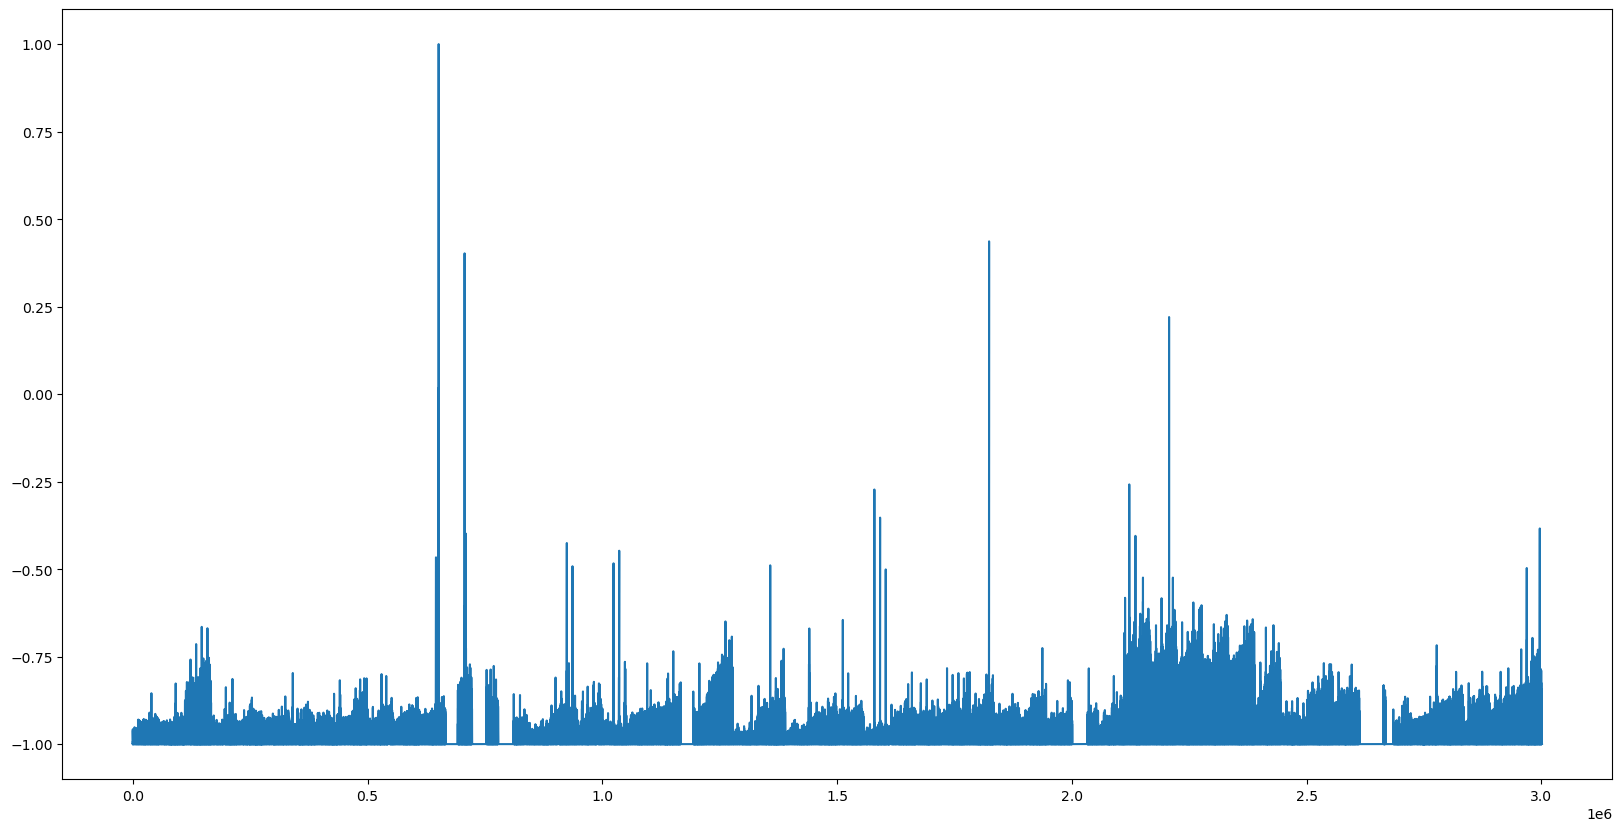

In [66]:
complete_df['sales'].plot(figsize=(20,10));

### TODO
- Reduce the amount of input data for the model (My 16G of RAM went out quickly trying some models).
- Keep analyzing data to seek for patterns.